<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Евгений, доброго дня! рад приветствовать тебя) <br />
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Описание данных
Данные геологоразведки трёх регионов находятся в файлах:
* `id` — уникальный идентификатор скважины;
* `f0, f1, f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
* `product` — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

## Загрузка и подготовка данных

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df_list = [df_0, df_1, df_2]

In [4]:
df_0.name = 'Данные геологоразведки первого региона'
df_1.name = 'Данные геологоразведки второго региона'
df_2.name = 'Данные геологоразведки третьего региона'

In [5]:
def information():
    for x in df_list:
        print('------{}------'.format((x.name)))
        print('')
        print(x.info())
        print('')
        print(x.head(10))
        print()

In [6]:
information()

------Данные геологоразведки первого региона------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
5  wX4Hy  0.969570  0.489775 -0.735383   64.741541
6  tL6pL  0.645075  0.530656  1.780266   49.055285
7  BYPU6 -0.400648  0.808337 -5.624670   72.943292
8  j9Oui  0.643105 -0.551583  2.372141  113.356160
9  OLuZU  2.173381  0.563698  9.441852  127.910945

------Данные геологоразведки второго региона-

In [7]:
for table in df_list:
    print('Число дубликатов в таблице "{}": {}'.format(table.name, table.duplicated().sum()))

Число дубликатов в таблице "Данные геологоразведки первого региона": 0
Число дубликатов в таблице "Данные геологоразведки второго региона": 0
Число дубликатов в таблице "Данные геологоразведки третьего региона": 0


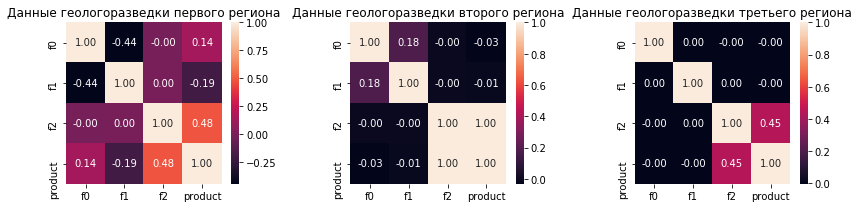

In [8]:
fig, ax = plt.subplots(1,3, figsize=(12,3))
for i in range(len(df_list)):
    ax[i] = sns.heatmap(df_list[i].corr(), annot=True, fmt='.2f', ax=ax[i])
    ax[i].title.set_text(df_list[i].name)
fig.tight_layout()
plt.show()

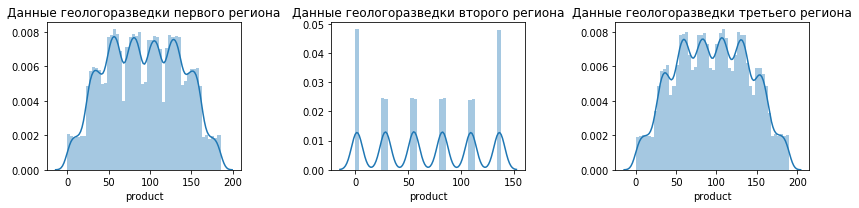

In [9]:
fig, ax = plt.subplots(1,3, figsize=(12,3))
for i in range(len(df_list)):
    ax[i] = sns.distplot(df_list[i]['product'], ax=ax[i])
    ax[i].title.set_text(df_list[i].name)
fig.tight_layout()
plt.show()

In [10]:
df_1['product'].value_counts().sort_index()

0.000000      8235
3.179103      8337
26.953261     8468
30.132364     8306
53.906522     8472
57.085625     8390
80.859783     8320
84.038886     8431
107.813044    8201
110.992147    8303
134.766305    8304
137.945408    8233
Name: product, dtype: int64

In [11]:
df_0['id'].value_counts().head(20)

AGS9W    2
QcMuo    2
TtcGQ    2
fiKDv    2
A5aEY    2
Tdehs    2
bsk9y    2
bxg6G    2
HZww2    2
74z30    2
QtilL    1
nJAZY    1
7ejGo    1
3ODLW    1
5al3I    1
pzfxw    1
zp60Q    1
woCDI    1
Bm48N    1
vGUTf    1
Name: id, dtype: int64

**Вывод**
* Данные полностью готовы для обучения модели - не содержат пропусков и дубликатов, типы данных верные, количество наблюдений достаточное.
* Признак **f2** во всех данных коррелирует со столбцом **product**.
* Данные для региона 2 отличаются. Имеется наивысшая корреляция признака **f2** и стообца **product**.  Кроме этого, в столбце **product** всего 12 уникальных значений, при этом данные имеют не нормальное распределение. Этот факт не позволяет нам убрать сильно кореллируемый признак перед обучением модели. 
* Во всех данных имеется незначительное количество повторов для одной скважены, однако они уникальны.
* В регионах 1 и 3 данные имеют практически нормальное распределение.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>Данные на базе) Хорошо, что есть культура проводить первчиную аналитику данных. Про высокую корреляцию - верно подмечено) Это может повлиять на моделирование)

## Обучение и проверка модели

In [12]:
real_df = pd.DataFrame()
predict_df = pd.DataFrame()

for i,j in zip(df_list,range(3)):
    features = i.drop(['product','id'], axis=1)
    target = i['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, random_state=12345, test_size=0.25) 
    
    model = LinearRegression().fit(features_train, target_train)
    predictions = model.predict(features_valid)
    
    rmse = mean_squared_error(target_valid, predictions) ** (1/2)
    mae = mean_absolute_error(predictions, target_valid)
    score = model.score(features_train, target_train)
    target_mean = i['product'].mean()
    
    print(i.name)
    print("predict: {0:.2f}".format(predictions.mean()))
    print("real: {0:.2f}".format(target_mean))
    print("RMSE: {0:.2f}".format(rmse))
    print("MAE: {0:.2f}".format(mae))
    print("SCORE: {0:.2f}".format(score))
    print("")
    
    real_df[j] = target_valid.reset_index(drop=True)
    predict_df[j] = predictions

Данные геологоразведки первого региона
predict: 92.59
real: 92.50
RMSE: 37.58
MAE: 30.92
SCORE: 0.27

Данные геологоразведки второго региона
predict: 68.73
real: 68.83
RMSE: 0.89
MAE: 0.72
SCORE: 1.00

Данные геологоразведки третьего региона
predict: 94.97
real: 95.00
RMSE: 40.03
MAE: 32.79
SCORE: 0.20



**Вывод**
* Модель хорошо предсказала среднее значение сырья в скважине.
* Для регионов 1 и 3 модель имеет высокие ошибки предсказания. Однако данные для региона, несмотря на меньшие ошибки, нельзя считать доставерными.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>Отлично, согласен с расчётами) Вот, как раз низкая ошибка у второго по счёту региона - как раз следствие высокоррелированности f2.

## Подготовка к расчёту прибыли

In [13]:
wells = 500
profit_wells = 200
budget = 10000000000
barrel = 450000

In [14]:
well_price = budget / profit_wells
print('Средняя стоимость одной скважины: {0:.0f} рублей'.format(well_price))

Средняя стоимость одной скважины: 50000000 рублей


In [15]:
min_product = well_price / barrel
print('Средний объем нефти на скважину: {0:.0f} тыс. баррелей'.format(min_product))

Средний объем нефти на скважину: 111 тыс. баррелей


In [16]:
def profit_calculation(target, predictions, count):
    probs_sorted = predictions.sort_values(ascending=False)[:count]
    top_target = target[probs_sorted.index]
    return barrel * top_target.sum() - budget

**Вывод**
* Для окупаемости средний объем нефти в одной скважине должен быть выше 111 тыс. баррелей.
* Среднее значение нефти в регионах 1 и 3 около 93 тыс. баррелей, а вот в регионе 2 всего 69.
* Риски разработки региона 2 на каждом этапе исследования возрастают.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
есть точка безубыточности) И верно, ни один регион не дотягивает.. Видно, что нужны DS-специалисты нефтянке:)

## Расчёт прибыли и рисков 

In [17]:
state = np.random.RandomState(12345)

In [18]:
def bootstrap(target, predict):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=wells)
        probs_sample = predict[target_sample.index]
        profit = profit_calculation(target, probs_sample, profit_wells)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

In [19]:
for i in range(len(df_list)):
    average, lower, upper, risk = bootstrap(real_df[i], predict_df[i])
    print(df_list[i].name)
    print('Средняя прибыль по региону: {:.2f} тыс.руб.'.format(average))
    print('95% доверительный интервал: ({:.2f} - {:.2f}) тыс.руб.'.format(lower, upper))
    print('Процент риска: {:.2%}'.format(risk))
    print('')

Данные геологоразведки первого региона
Средняя прибыль по региону: 396164984.80 тыс.руб.
95% доверительный интервал: (-111215545.89 - 909766941.55) тыс.руб.
Процент риска: 6.90%

Данные геологоразведки второго региона
Средняя прибыль по региону: 461155817.28 тыс.руб.
95% доверительный интервал: (78050810.75 - 862952060.26) тыс.руб.
Процент риска: 0.70%

Данные геологоразведки третьего региона
Средняя прибыль по региону: 392950475.17 тыс.руб.
95% доверительный интервал: (-112227625.38 - 934562914.55) тыс.руб.
Процент риска: 6.50%



**Вывод**
* Регионы 1 и 3 по прежнему крайне похожи и имеют приблизительно одинаковые вероятности окупаемости. Риски составляют 6,9 и 6,5% для региона 1 и 3 соотвественно.
* Ввиду отличия данных для региона 2 (всего 12 категорий, с преобладающими крайними значениями) выбор его в качестве лучшего сомнителен, даже несмотря на низкий процет риска полученный с помощью **bootstrap**.
* Удаление признака **f2** из региона 2 приводит к недостаточному обучению модели и к 100% риску. Попытки обучить модель на регионах 1 и 3 и заполнить столбец **product** не привели к положительным результатам. Возможно, есть какой-то еще подход, который поможет использовать данные для региона 2?

## Вывод

Однозначной рекомендации по выбору региона для бурения сделать нельзя. Несмотря на то что по критерию (риск <2.5%) подходит регион 2, здравый смысл не позволяет рекомендавать его ввиду особенности исходных данных. В случае, если данные для региона 2 верны, он будет предпочтительным для бурения, однако, если уточнить этот вопрос не представляется возможным, лучше всего выбрать регионы 1 или 3.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font><br>
<font color='green'><br>
Евгений, всё по теме и в точку у тебя получилось)<BR> 
Результ, выводы и даже доверительный интервал - тот, что нужен, именно для прогноза.<br>
Только значения 1000 и 500 в бутстрепе - лучше выносить в глобальные переменные)<br>
    
Данный проект не простой. И не только тем, что задание с первого раза может показатья не понятным.
Но и потому, что его цель не просто построить прогноз по модели или прогноз продаж. А научиться выбирать лучшее управленческое решение на основе метода моделирования ситуации. Т.е. нужно было уйти чуть в сторону от классического моделирования как такового.<br><br>
О подходах) Бутсреп - он близок к методам управленческого моделирования монте-карло.
В этом ключе и есть смысл его рассматривать. Есть ещё одно направление в этой теме. Его продвигает российская компания - AnyLogic. И у неё есть хороший продукт с одноимённым названием. Мне приходилось как-то смотреть его... интересно. Можешь ролик из инета глянуть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и вообще моделирование с целью найти оптимальное решение - может по-другому "зайти"... <br>
    
Спасибо) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован